In [2]:
import csv
import sys
import heapq
import networkx as nx
import matplotlib.pyplot as plt

In [10]:
class Graph:
    def __init__(self):
        self.nodes = set()
        self.edges = {}

    def add_node(self, node):
        self.nodes.add(node)

    def add_edge(self, node1, node2, weight):
        self.edges.setdefault(node1, []).append((node2, weight))
        self.edges.setdefault(node2, []).append((node1, weight))

def dijkstra(graph, start):
    distances = {node: sys.maxsize for node in graph.nodes}
    distances[start] = 0
    queue = [(0, start)]
    visited = set()

    while queue:
        current_distance, current_node = heapq.heappop(queue)
        if current_node in visited:
            continue
        visited.add(current_node)

        for neighbor, weight in graph.edges[current_node]:
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(queue, (distance, neighbor))

    return distances

def get_shortest_path(distances, start, target):
    path = [target]
    while target != start:
        for neighbor, weight in graph.edges[target]:
            if distances[target] == distances[neighbor] + weight:
                path.append(neighbor)
                target = neighbor
                break
    return ' -> '.join(reversed(path))

# Membaca dataset dari file CSV
dataset_file = 'dataset.csv'

graph = Graph()

with open(dataset_file, 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        city1 = row['kota asal']
        city2 = row['kota tujuan']
        weight = int(row['jarak'])

        graph.add_node(city1)
        graph.add_node(city2)
        graph.add_edge(city1, city2, weight)

# Menentukan kota asal dan kota tujuan
start_city = 'jakarta'
target_city = 'surabaya'

# Menjalankan algoritma Dijkstra
distances = dijkstra(graph, start_city)

# Mendapatkan jarak terpendek dan jalur terpendek
shortest_distance = distances[target_city]
shortest_path = get_shortest_path(distances, start_city, target_city)

# Menampilkan hasil
print(f"Jarak terpendek dari {start_city} ke {target_city} adalah {shortest_distance} km.")
print(f"Jalur terpendek: {shortest_path}")


Jarak terpendek dari jakarta ke surabaya adalah 400 km.
Jalur terpendek: jakarta -> surabaya


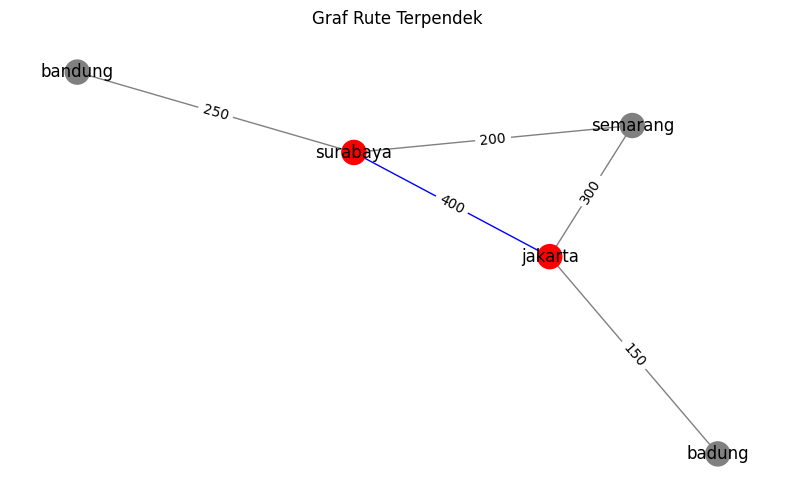

In [14]:
# Membuat objek graph menggunakan Networkx
graph = nx.Graph()

with open(dataset_file, 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        city1 = row['kota asal']
        city2 = row['kota tujuan']
        weight = int(row['jarak'])

        graph.add_edge(city1, city2, weight=weight)

# Menentukan rute terpendek menggunakan algoritma Dijkstra
start_node = 'jakarta'
end_node = 'surabaya'
shortest_path = nx.dijkstra_path(graph, start_node, end_node)
shortest_path_edges = list(zip(shortest_path, shortest_path[1:]))

# Menentukan posisi node pada graf
pos = nx.spring_layout(graph)

# Menentukan atribut berdasarkan jalur terpendek
edge_colors = ['b' if edge in shortest_path_edges else 'gray' for edge in graph.edges()]
node_colors = ['r' if node in shortest_path else 'gray' for node in graph.nodes()]

# Menggambar graf
plt.figure(figsize=(10, 6))
nx.draw_networkx(graph, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors)
edge_labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
plt.title('Graf Rute Terpendek')
plt.axis('off')
plt.show()
